<a href="https://colab.research.google.com/github/divyaparadkar/DeepLearning_Traning/blob/main/Name%3D_Divya_paradkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import custom_object_scope


In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()



In [ ]:

print("the shape of X_train is:{} and y_train is {}".format(X_train.shape,y_train.shape))
print()
print("the shape of X_test is:{} and y_test is {}".format(X_test.shape,y_test.shape))



the shape of X_train is:(60000, 28, 28) and y_train is (60000,)

the shape of X_test is:(10000, 28, 28) and y_test is (10000,)


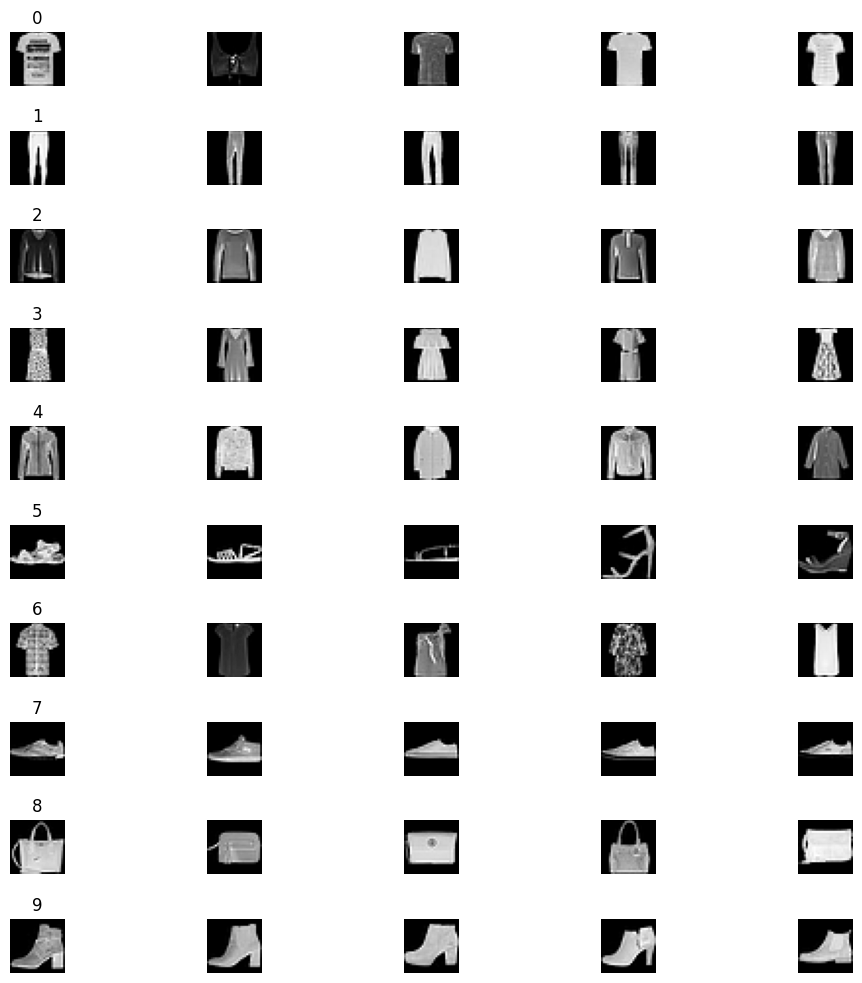

In [ ]:
X_class_num=[]
n_rows=10
n_cols=5

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
fig.tight_layout()
for j in range(n_rows):
    x_select = X_train[y_train == j]
    for i in range(n_cols):
        random_index = random.randint(0, len(x_select) - 1)
        ax[j][i].imshow(x_select[random_index, :, :], cmap="gray")
        ax[j][i].axis('off')


        if i == 0:
            ax[j][i].set_title(str(j))
            X_class_num.append(len(x_select))




In [ ]:
inp_shape = 28
batcg_size = 32
n_class =10

input_shape = (inp_shape, inp_shape, 1)


X_train = X_train.astype('float32') / 255.0  # Convert to float32 and normalize

X_test = X_test.astype('float32') / 255.0






In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], inp_shape, inp_shape, 1)
X_test = X_test.reshape(X_test.shape[0], inp_shape, inp_shape, 1)



In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test = to_categorical(y_test,n_class)
y_train = to_categorical(y_train,n_class)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if n_class > 10:
    model.add(Conv2D(filters=50, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


if n_class > 50:
    model.add(Conv2D(filters=100, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=128, activation='relu'))


model.add(Dense(units=n_class, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.compile(Adam(lr=0.001),loss="spars_categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 20)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 1024)              5

In [ ]:
if len(set(y_train.flatten())) > 1:  # Check if there are multiple unique labels
    y_train = to_categorical(y_train, num_classes=len(set(y_train.flatten())))

model.compile(optimizer=Adam(lr=0.01), loss="sparse_categorical_crossentropy", metrics=["acc"])  # Correct loss function name

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dense_6 (Dense)             (None, 13, 13, 10)        330       
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-54-dc965fdd3cec>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [43264,10] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2933]

In [ ]:
# prompt: history1 = model.fit(X_train, y_train,
#           batch_size=256,
#           epochs=10,
#           verbose=1)
# complete this code

import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'loss' is not defined

In [ ]:
# prompt: loss = history1.history['loss']
# solve this error

The error message "loss' is not defined" indicates that the variable `loss` is not defined in the current scope. To fix this, you need to make sure that the variable `loss` is defined before you try to access it.

In this case, the variable `loss` is defined inside the `model.fit()` function. Therefore, you need to access it within the scope of that function. One way to do this is to use a nested function:



NameError: name 'test_images' is not defined